**Import Necessary Libraries**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk

**Load The Dataset**

In [4]:
data = pd.read_csv('/content/WC_AT.csv')

**Descriptive Statistics**

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Waist   109 non-null    float64
 1   AT      109 non-null    float64
dtypes: float64(2)
memory usage: 1.8 KB


In [8]:
data.describe()

,Waist,AT
count,109.000000,109.000000
mean,91.901835,101.894037
std,13.559116,57.294763
min,63.500000,11.440000
25%,80.000000,50.880000
50%,90.800000,96.540000
75%,104.000000,137.000000
max,121.000000,253.000000


Based on the above we have total 109 rows with no missing values and 2 features Waist: Circumferance of the waist is the input and AT: Adipose Tissue as the output to be predicted.

We apply Linear Regression model because the dataset needs a bivariate analysis and the relationship has to be found between 2 continuous variables with Waist as Predictor and AT as dependant Variable.

**Finding Correlation Between the features**

In [6]:
data.corr()

,Waist,AT
Waist,1.000000,0.818558
AT,0.818558,1.000000


Based on above there is 81.85% correlation between waist circumferance and AT, means they have high positive correlation.

<ipython-input-23-02f5ac3def62>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Waist'])


<Axes: xlabel='Waist', ylabel='Density'>

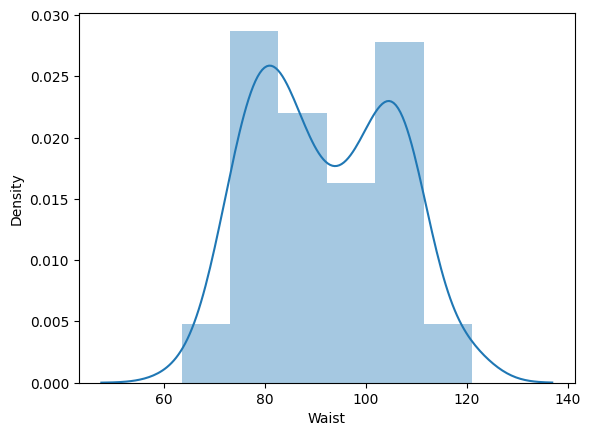

In [23]:
import seaborn as sns
sns.distplot(data['Waist'])

<ipython-input-25-b0c2e94bb245>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['AT'])


<Axes: xlabel='AT', ylabel='Density'>

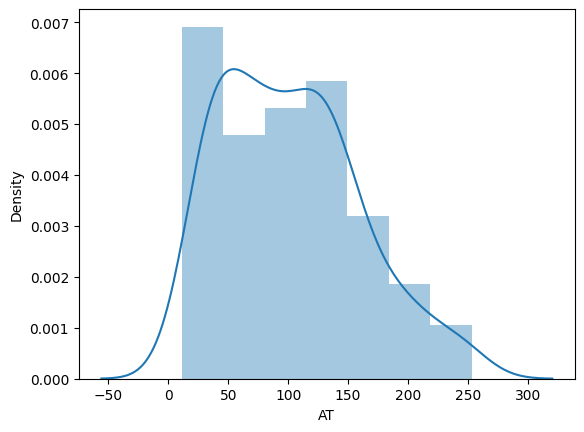

In [25]:
sns.distplot(data['AT'])

**Interpretation**: Based on above 2 charts we can see the distribution of both Waist and AT is similar.

**Fitting The Data To Linear Regression Model**

In [26]:
import statsmodels.formula.api as smf
model = smf.ols("AT~Waist",data=data).fit()

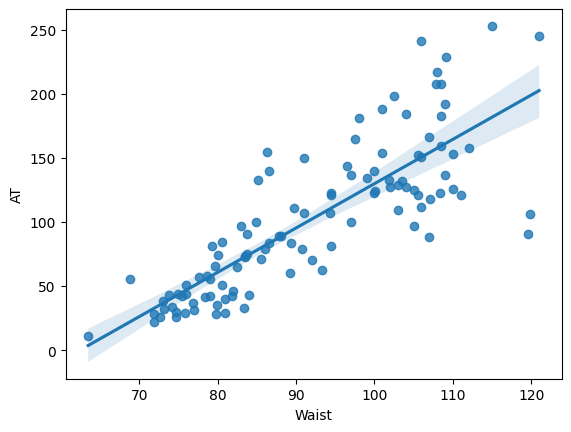

In [27]:
sns.regplot(x="Waist", y="AT", data=data);

In [29]:
#Coefficients
model.params

Intercept   -215.981488
Waist          3.458859
dtype: float64

**Model Validation Technique**

In [30]:
print(model.tvalues, '\n', model.pvalues )

Intercept    -9.909103
Waist        14.740376
dtype: float64 
 Intercept    8.197416e-17
Waist        1.618607e-27
dtype: float64


Since the Probability is 1.618607e-27 which is less than 0.05, we reject the Null Hypothesis which says there is no correlation between Waist Circumferance and Adipose Tissue.

In [31]:
model.rsquared , model.rsquared_adj

(0.670036893052843, 0.6669531256981966)

Model is trained to predict the data with 67% accuracy.

**Predict For New Data Points**

In [46]:
new_data = pd.Series([10, 80])

In [47]:
data_pred = pd.DataFrame(new_data,columns=['Waist'])

In [48]:
model.predict(data_pred)

0   -181.392894
1     60.727263
dtype: float64

Model is able to predict the values of Adipose tissue but negative AT is not practically possible but model is trained based on Mathematical function.